In [1]:
import alpaca_trade_api as tradeapi

In [3]:
from alpaca.trading.client import TradingClient
from alpaca.trading.enums import OrderSide, TimeInForce, QueryOrderStatus
from alpaca.trading.requests import MarketOrderRequest, LimitOrderRequest, StopLossRequest, StopLimitOrderRequest, GetOrdersRequest
from alpaca.trading.stream import TradingStream


import config

# ACCOUNT DETAILS

In [4]:
client = TradingClient(config.API_KEY, config.SECRET_KEY, paper=True)

In [4]:
account = dict(client.get_account())
for i,j in account.items():
    print(i," : ", j)

id  :  8b2ae497-12e9-414e-9f2f-b912665aafdf
account_number  :  PA3F7N9C7WIP
status  :  AccountStatus.ACTIVE
crypto_status  :  AccountStatus.ACTIVE
currency  :  USD
buying_power  :  199750.8
regt_buying_power  :  199750.8
daytrading_buying_power  :  0
non_marginable_buying_power  :  99875.4
cash  :  99875.4
accrued_fees  :  0
pending_transfer_out  :  None
pending_transfer_in  :  0
portfolio_value  :  99875.4
pattern_day_trader  :  False
trading_blocked  :  False
transfers_blocked  :  False
account_blocked  :  False
created_at  :  2024-04-29 18:29:23.101977+00:00
trade_suspended_by_user  :  False
multiplier  :  2
shorting_enabled  :  True
equity  :  99875.4
last_equity  :  99875.4
long_market_value  :  0
short_market_value  :  0
initial_margin  :  0
maintenance_margin  :  0
last_maintenance_margin  :  0
sma  :  0
daytrade_count  :  4
options_buying_power  :  99875.4
options_approved_level  :  2
options_trading_level  :  2


# PLACE ORDER

In [5]:
class Order:
    @staticmethod
    def order_details_market(symbol, quant, side, time, order_id):
        return MarketOrderRequest(
            symbol = symbol,
            qty = quant,
            side = side,
            time_in_force = time,
            client_order_id = order_id
        )
    
    
    


In [60]:
sym = "TSLA"

order_details_buy = MarketOrderRequest(
    symbol = sym,
    qty = 100,
    side = OrderSide.BUY,
    time_in_force = TimeInForce.DAY
)

In [63]:
order_buy = client.submit_order(order_data=order_details_buy)

In [45]:
  
sym = "TSLA"

order_details_sell = MarketOrderRequest(
    symbol = sym,
    qty = 100,
    side = OrderSide.SELL,
    time_in_force = TimeInForce.DAY,
    client_order_id = "test_order_sell"
)

In [46]:
order_sell = client.submit_order(order_data=order_details_sell)

## Cancel Order


In [64]:
order_id = order_buy.id

In [65]:
cancel = client.cancel_order_by_id(order_id)

# PORTFOLIO - POSITION DETAILS

In [16]:
portfolio = client.get_all_positions()
for position in portfolio:
    print("{} shares of {}".format(position.qty, position.symbol))

10 shares of AAPL
-10 shares of AMZN
-200 shares of TSLA


In [32]:

for i in portfolio:
    print (i.symbol)
    if i.symbol == 'AAPL':
        if i.side == 'long':
            print("Yayyyy!!!")
        

AAPL
Yayyyy!!!
AMZN
TSLA


In [33]:
client.close_position('AMZN')

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('f801f835-bfe6-4a9d-a6b1-ccbb84bfd75f'),
    'canceled_at': None,
    'client_order_id': '315e5a52-2a63-46bf-883c-2a0f447703d1',
    'created_at': datetime.datetime(2024, 5, 1, 21, 57, 45, 198346, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('464035d0-d99f-4877-ac2f-8c833fe3f29d'),
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': '10',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.ACCEPTED: 'accepted'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 5, 1, 21, 57, 45, 198346, tzinfo=TzInfo(UTC)),
    'symbol': 'AMZN',
    '

In [24]:
client.get_all_positions()

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('b0b6dd9d-8b9b-48a9-ba46-b9d54906e415'),
     'asset_marginable': True,
     'avg_entry_price': '171.07',
     'avg_entry_swap_rate': None,
     'change_today': '-0.0014677390946985',
     'cost_basis': '1710.7',
     'current_price': '170.08',
     'exchange': <AssetExchange.NASDAQ: 'NASDAQ'>,
     'lastday_price': '170.33',
     'market_value': '1700.8',
     'qty': '10',
     'qty_available': '10',
     'side': <PositionSide.LONG: 'long'>,
     'swap_rate': None,
     'symbol': 'AAPL',
     'unrealized_intraday_pl': '-9.9',
     'unrealized_intraday_plpc': '-0.0057871046939849',
     'unrealized_pl': '-9.9',
     'unrealized_plpc': '-0.0057871046939849',
     'usd': None},
 {   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('f801f835-bfe6-4a9d-a6b1-ccbb84bfd75f'),
     'asset_marginable': True,
     'avg_entry_price': '178.91',
     'avg_entry_swap_rate': None,
     'change_toda

In [30]:
get_orders_data = GetOrdersRequest(
    status=QueryOrderStatus.CLOSED,
    limit=100,
    nested=True  # show nested multi-leg orders
)

client.get_orders(filter=get_orders_data)

/Users/cjs/Desktop/Alpaca/alpaca/lib/python3.9/site-packages/pydantic/_internal/_core_utils.py:568: RuntimeWarning: coroutine 'TradingStream._run_forever' was never awaited
  return _validate_core_schema(schema)


[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('8ccae427-5dd0-45b3-b5fe-7ba5e422c766'),
     'canceled_at': datetime.datetime(2024, 4, 28, 11, 28, 38, 762067, tzinfo=TzInfo(UTC)),
     'client_order_id': '2ad0cc0d-437e-41f2-9e2e-1bf43363e003',
     'created_at': datetime.datetime(2024, 4, 27, 12, 57, 8, 744035, tzinfo=TzInfo(UTC)),
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': UUID('955c3663-4825-4773-8ec8-d4b92810e535'),
     'legs': None,
     'limit_price': None,
     'notional': None,
     'order_class': <OrderClass.SIMPLE: 'simple'>,
     'order_type': <OrderType.MARKET: 'market'>,
     'qty': '100',
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': <OrderSide.BUY: 'buy'>,
     'status': <OrderStatus.CANCELED: 'canceled'>,
     'stop_price': None,
     'submitted_at': datet

# Trading Stratergies


In [6]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

In [7]:
data_client = StockHistoricalDataClient(config.API_KEY, config.SECRET_KEY)

# Get historical data
historical_data_TSLA = StockBarsRequest(
    symbol_or_symbols= ["TSLA"],
    timeframe=TimeFrame.Hour,
    start="2024-01-01",
    end="2024-04-26"
)

# Retrieve daily bars for Bitcoin in a DataFrame and printing it
tsla_bars = data_client.get_stock_bars(historical_data_TSLA)

# Convert to dataframe
tsla_data = tsla_bars.df

In [122]:
tsla_data

open    high     low   close      volume  \
symbol timestamp                                                               
TSLA   2024-01-02 09:00:00+00:00  248.05  250.96  248.05  250.33    190850.0   
       2024-01-02 10:00:00+00:00  250.31  250.47  248.80  248.83    124610.0   
       2024-01-02 11:00:00+00:00  248.75  248.82  245.10  246.27    269091.0   
       2024-01-02 12:00:00+00:00  246.30  247.50  245.28  245.44    319553.0   
       2024-01-02 13:00:00+00:00  247.07  251.00  245.25  250.69   1860820.0   
...                                  ...     ...     ...     ...         ...   
       2024-04-25 19:00:00+00:00  167.57  170.88  167.46  170.31  24046511.0   
       2024-04-25 20:00:00+00:00  170.18  172.88  169.99  171.95   6042291.0   
       2024-04-25 21:00:00+00:00  171.81  172.62  171.62  172.35    424668.0   
       2024-04-25 22:00:00+00:00  172.37  172.80  170.18  172.46    363750.0   
       2024-04-25 23:00:00+00:00  172.47  173.33  172.30  173.15    368766.0   

                                  trade_count        vwap  
symbol timestamp                                           
TSLA   2024-01-02 09:00:00+00:00       4071.0  250.161823  
       2024-01-02 10:00:00+00:00       3521.0  249.677716  
       2024-01-02 11:00:00+00:00      10713.0  246.502391  
       2024-01-02 12:00:00+00:00       9386.0  246.228491  
       2024-01-02 13:00:00+00:00      36786.0  248.409580  
...                                       ...         ...  
       2024-04-25 19:00:00+00:00     246062.0  169.287787  
       2024-04-25 20:00:00+00:00      22899.0  170.642571  
       2024-04-25 21:00:00+00:00       9627.0  172.222618  
       2024-04-25 22:00:00+00:00       6368.0  172.364076  
       2024-04-25 23:00:00+00:00       7232.0  172.809026  

[1280 rows x 7 columns]

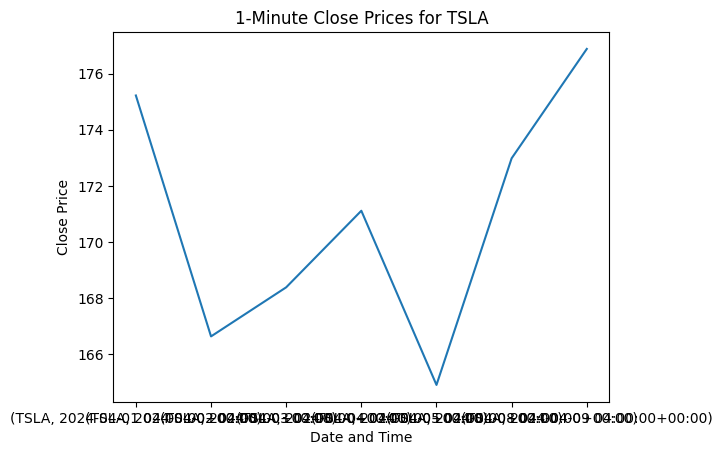

In [109]:
import matplotlib.pyplot as plt

# Assuming df_resampled is already defined and contains the resampled data
tsla_data['close'].plot(title='1-Minute Close Prices for TSLA')
plt.xlabel('Date and Time')
plt.ylabel('Close Price')
plt.show()


## Moving Average


In [8]:
import numpy as np
import pandas as pd
import time

tsla_data = pd.read_csv('tsla_live_prices.csv')


def calc_ma():

    #Get data
    data = pd.read_csv('tsla_live_prices.csv')

    # Convert to DataFrame for easier manipulation
    closes = data['price'].values

    # Calculate moving averages
    ma10 = np.mean(closes[-300:])  # Last 10 data points
    ma20 = np.mean(closes[-500:])  # Last 20 data points

    print(f"MA100: {ma10}, MA200: {ma20}")

    if ma10 > ma20:  # Check if 10 day MA is above 20 day MA
        print("Buying signal")
        sym = 'TSLA'
        qty = 100
        side = OrderSide.BUY
        timeif = TimeInForce.GTC
        o_id = 'Buy_at ' + str(ma10)
        buy_order = Order.order_details_market(sym,qty,side,timeif,o_id)
        client.submit_order(order_data=buy_order)
        print(buy_order.client_order_id)
    elif ma10 < ma20:
        print("Selling signal")
        sym = 'TSLA'
        qty = 100
        side = OrderSide.SELL
        timeif = TimeInForce.GTC
        o_id = 'Sell_at ' + str(ma10)
        sell_order = Order.order_details_market(sym,qty,side,timeif,o_id)
        client.submit_order(order_data=sell_order)
        print(sell_order.client_order_id)
        
    


try:
    while True:
        calc_ma()
        time.sleep(300)  # Correct function call to sleep
except KeyboardInterrupt:
    print("MA calc stopped manually")



MA100: 193.21776666666668, MA200: 193.42407999999998
Selling signal
Sell_at193.21776666666668
MA100: 189.3465, MA200: 191.22661
Selling signal
Sell_at189.3465
MA100: 187.0874, MA200: 189.09386999999998
Selling signal
Sell_at187.0874
MA100: 187.26155, MA200: 187.31519
Selling signal
Sell_at187.26155
MA100: 187.18073333333334, MA200: 187.1491
Buying signal
Buy_at187.18073333333334
MA100: 185.70021666666665, MA200: 186.30561
Selling signal
Sell_at185.70021666666665
MA100: 185.37383333333335, MA200: 185.39302
Selling signal
Sell_at185.37383333333335
MA100: 185.19676666666666, MA200: 185.33523000000002
Selling signal
Sell_at185.19676666666666
MA100: 184.90046666666666, MA200: 185.0047
Selling signal
Sell_at184.90046666666666
MA100: 184.34423333333334, MA200: 184.68797999999998
Selling signal
Sell_at184.34423333333334
MA100: 184.28878333333333, MA200: 184.59175
Selling signal
Sell_at184.28878333333333
MA100: 184.40089999999998, MA200: 184.39263999999997
Buying signal
Buy_at184.40089999999998

APIError: {"buying_power":"827.28","code":40310000,"cost_basis":"18923.16","message":"insufficient buying power"}

In [128]:
def check_balance():
    
    






def calc_ma():

    #Get data
    data = pd.read_csv('tsla_live_prices.csv')

    # Convert to DataFrame for easier manipulation
    closes = data['price'].values

    # Calculate moving averages
    ma10 = np.mean(closes[-300:])  # Last 10 data points
    ma20 = np.mean(closes[-500:])  # Last 20 data points

    print(f"MA100: {ma10}, MA200: {ma20}")

    if ma10 > ma20:  # Check if 10 day MA is above 20 day MA
        print("Buying signal")
        sym = 'TSLA'
        qty = 100
        side = OrderSide.BUY
        timeif = TimeInForce.GTC
        o_id = 'Buy_at' + str(ma10)
        buy_order = Order.order_details_market(sym,qty,side,timeif,o_id)
        cost = qty * closes[-1]
        client.submit_order(order_data=buy_order)
        print(buy_order.client_order_id)
    elif ma10 < ma20:
        print("Selling signal")
        sym = 'TSLA'
        qty = 100
        side = OrderSide.SELL
        timeif = TimeInForce.GTC
        o_id = 'Sell_at' + str(ma10)
        sell_order = Order.order_details_market(sym,qty,side,timeif,o_id)
        client.submit_order(order_data=sell_order)
        print(sell_order.client_order_id)
        


,,open,high,low,close,volume,trade_count,vwap
symbol,timestamp,,,,,,,
TSLA,2024-04-29 08:00:00+00:00,176.3,176.58,173.87,175.58,62204.0,1288.0,175.732604


In [9]:
account = client.get_account()

In [15]:
print(account.cash)

101320.83


# Test Section

In [36]:
import pandas as pd

df = pd.read_csv('Hist_data_TSLA.csv')
df = df.drop(columns=['trade_count','vwap'])
df.tail()

,symbol,timestamp,open,high,low,close,volume
5277,TSLA,2024-04-30 19:00:00+00:00,184.1500,184.87,182.8401,183.3800,15570563.0
5278,TSLA,2024-04-30 20:00:00+00:00,183.3800,183.77,180.7600,181.4900,5472762.0
5279,TSLA,2024-04-30 21:00:00+00:00,181.4306,181.55,180.5900,181.0000,337114.0
5280,TSLA,2024-04-30 22:00:00+00:00,181.0000,183.28,180.7012,181.1106,279900.0
5281,TSLA,2024-04-30 23:00:00+00:00,181.1400,181.47,180.7600,181.0000,164242.0
